#  Gyan Bahadur Magar
## The sparks foundation - Internship task one 
## Given students records - study hours per day and scores
## Task- What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
#importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
url="http://bit.ly/w-data"  #reading the given data
 #the url contain comma separated values (or csv) file importing
student_data=pd.read_csv(url) 
print("The students data have been successfully imported.")
# just print the default records from top it will print 5 
student_data.head() # or

The students data have been successfully imported.


Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

In [3]:
#sanity check - important but here we have few data/records
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### there is no null values on the record i.e we are clear to go

In [4]:
student_data.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

### Now lets plot our data in graphs to better understand of the data we have here

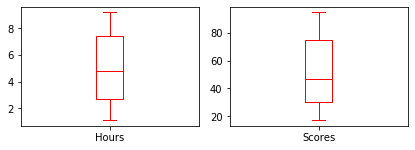

In [5]:
student_data.plot(kind='box', color = 'red', subplots=True, layout=(2,2), sharex=False)
plt.tight_layout()
plt.show()

In [6]:
#boxplot - no outlier 

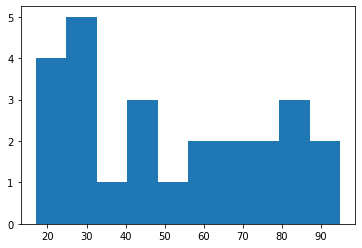

In [7]:
plt.hist(student_data.Scores);

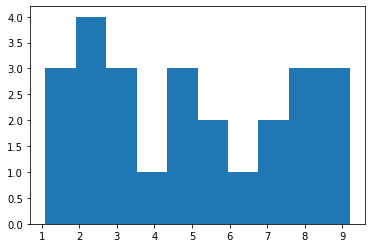

In [8]:
plt.hist(student_data.Hours);

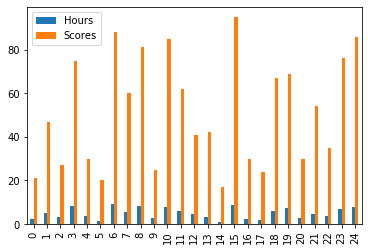

In [9]:
student_data.plot(kind='bar');

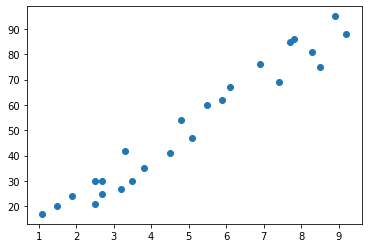

In [10]:
plt.scatter(student_data['Hours'],student_data['Scores']);

In [11]:
# using seaborn for plot
#importing seaborn as sb it alias you can put as you wish sb or sns
import seaborn as sb

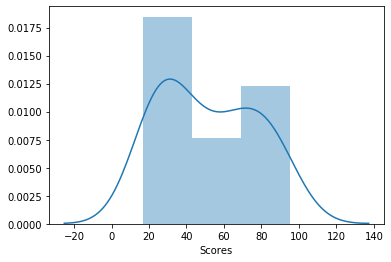

In [12]:
sb.distplot(student_data['Scores']);

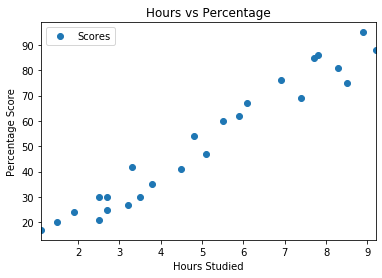

In [13]:
# or we can use this method too
student_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

##### From this above graph we can see the relationship between the precentage score and student hours sutdied

In [14]:
# data Prepartion into "attributes" (inputs) and "labels" (outputs).
X = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values 

In [15]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


# Build Decision tree classifier using sklearn

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
#
# clf = LinearRegression()
# clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

# o/p - 0.8980888932690286


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = LinearRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9454906892105356

#### same but reducing the test_size to 20% from 25% and random_state from 1 to 0, it will give more accuracy because here the record size is small.

<function matplotlib.pyplot.show(*args, **kw)>

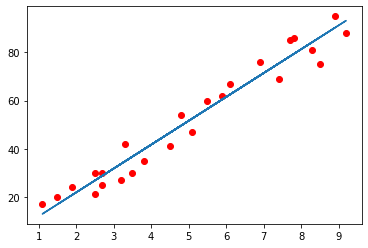

In [20]:
line = clf.coef_*X+clf.intercept_
plt.scatter(X, y, color='red')
plt.plot(X, line)
plt.show

In [21]:
"""data predicting"""
X_test
y_predict = clf.predict(X_test)
dataframe1 = pd.DataFrame({'Actual' : y_test, 'Predicted': y_predict})
dataframe1.head()

Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033

In [22]:
"""Average number of correct predictions or accuracy of prediction"""
clf.score(X_test, y_test)

0.9454906892105356

# accuracy of prediction rate is 94.54%

In [29]:
#finally predicting the score we get when study hours is 9.25
hours = [[9.25]]
prediction = clf.predict(hours)
print("Number of Hours = {}".format(hours))
print("Predticted Score = {}".format(prediction[0]))

Number of Hours = [[9.25]]
Predticted Score = 93.69173248737538


#  Here we have predicted the scores 93.69173248737538 if the student study hours is 9.25 hrs.